In [14]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
file_path = '/content/drive/MyDrive/DL/DLWeek5/ReviewTokoBaju.csv'
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
# Data preprocessing: Drop rows with missing 'Review Text' or 'Recommended IND'
df_clean = df.dropna(subset=['Review Text', 'Recommended IND'])

# Extracting the input (Review Text) and target (Recommended IND)
reviews = df_clean['Review Text']
labels = df_clean['Recommended IND']

# Tokenization and padding of text data
num_words = 50000  # Use top 50,000 words
maxlen = 300  # Maximum sequence length

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
X_pad = pad_sequences(X, maxlen=maxlen)

# Get the target labels as numpy array
y = labels.values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [17]:
# Define model architecture functions (RNN, LSTM, GRU)
def build_model_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=100, input_length=maxlen))
    model.add(SimpleRNN(128, return_sequences=True))
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(SimpleRNN(64))  # Second layer with 64 units
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_model_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=100, input_length=maxlen))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(LSTM(64))  # Second layer with 64 units
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_model_gru():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=100, input_length=maxlen))
    model.add(GRU(128, return_sequences=True))
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(GRU(64))  # Second layer with 64 units
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Training SimpleRNN model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


283/283 - 110s - 389ms/step - accuracy: 0.7836 - loss: 0.5202 - val_accuracy: 0.8207 - val_loss: 0.4720
Epoch 2/10
283/283 - 103s - 365ms/step - accuracy: 0.8206 - loss: 0.4603 - val_accuracy: 0.8435 - val_loss: 0.3887
Epoch 3/10
283/283 - 147s - 519ms/step - accuracy: 0.8478 - loss: 0.3659 - val_accuracy: 0.8373 - val_loss: 0.4431
Epoch 4/10
283/283 - 103s - 364ms/step - accuracy: 0.8784 - loss: 0.2924 - val_accuracy: 0.8695 - val_loss: 0.3257
Epoch 5/10
283/283 - 147s - 518ms/step - accuracy: 0.9011 - loss: 0.2462 - val_accuracy: 0.8719 - val_loss: 0.3460
Epoch 6/10
283/283 - 137s - 485ms/step - accuracy: 0.9090 - loss: 0.2256 - val_accuracy: 0.8711 - val_loss: 0.3276
Epoch 7/10
283/283 - 147s - 520ms/step - accuracy: 0.9116 - loss: 0.2247 - val_accuracy: 0.8660 - val_loss: 0.3910
Test Accuracy (SimpleRNN): 86.95%
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step
Precision (SimpleRNN): 0.8890
Recall (SimpleRNN): 0.9610
F1 Score (SimpleRNN): 0.9236
AUC (SimpleRNN): 0.8839


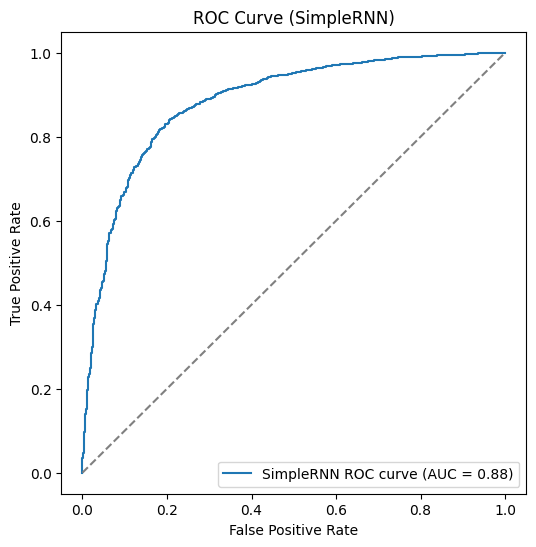

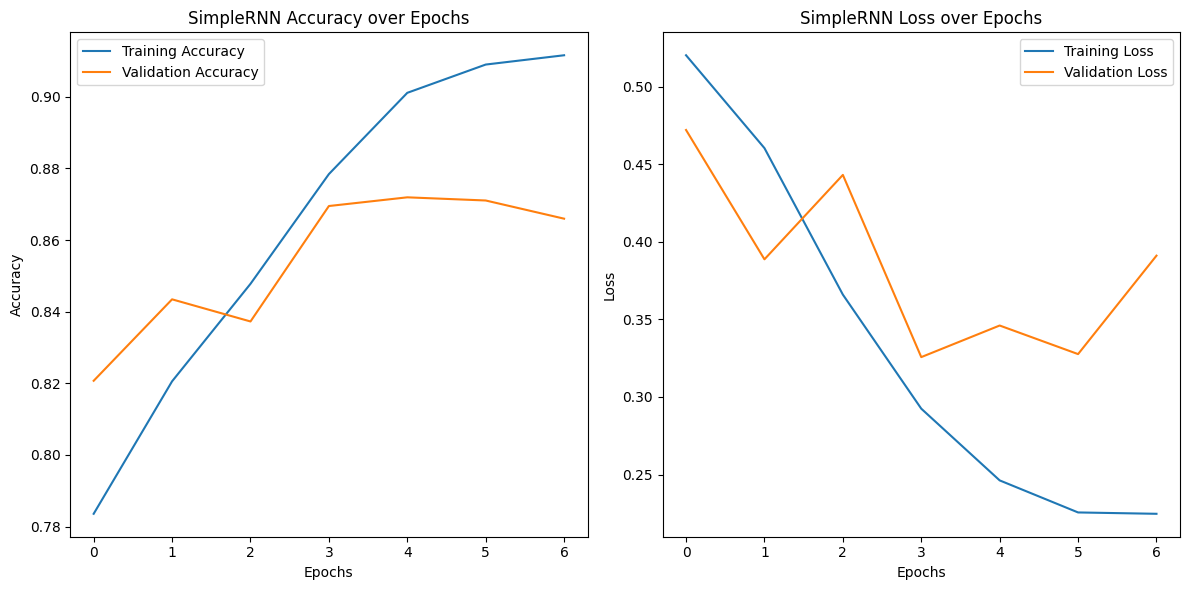

Training LSTM model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


283/283 - 359s - 1s/step - accuracy: 0.8560 - loss: 0.3322 - val_accuracy: 0.8808 - val_loss: 0.2610
Epoch 2/10
283/283 - 379s - 1s/step - accuracy: 0.9144 - loss: 0.2112 - val_accuracy: 0.8843 - val_loss: 0.2563
Epoch 3/10
283/283 - 386s - 1s/step - accuracy: 0.9327 - loss: 0.1704 - val_accuracy: 0.8916 - val_loss: 0.2754
Epoch 4/10
283/283 - 381s - 1s/step - accuracy: 0.9495 - loss: 0.1319 - val_accuracy: 0.8874 - val_loss: 0.3048
Epoch 5/10
283/283 - 381s - 1s/step - accuracy: 0.9612 - loss: 0.1008 - val_accuracy: 0.8741 - val_loss: 0.3551
Test Accuracy (LSTM): 88.43%
142/142 ━━━━━━━━━━━━━━━━━━━━ 31s 213ms/step
Precision (LSTM): 0.9458
Recall (LSTM): 0.9112
F1 Score (LSTM): 0.9282
AUC (LSTM): 0.9319


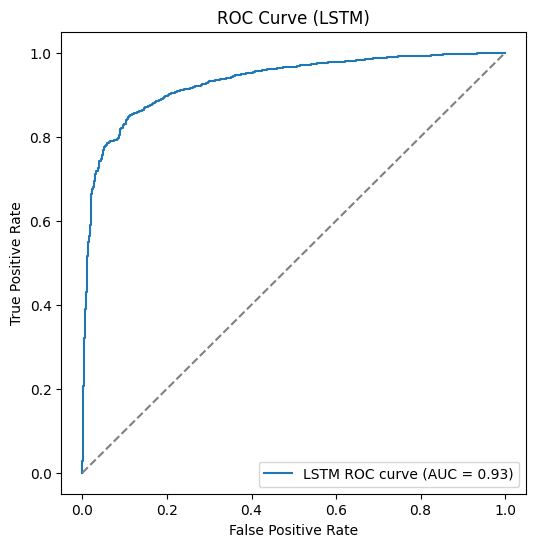

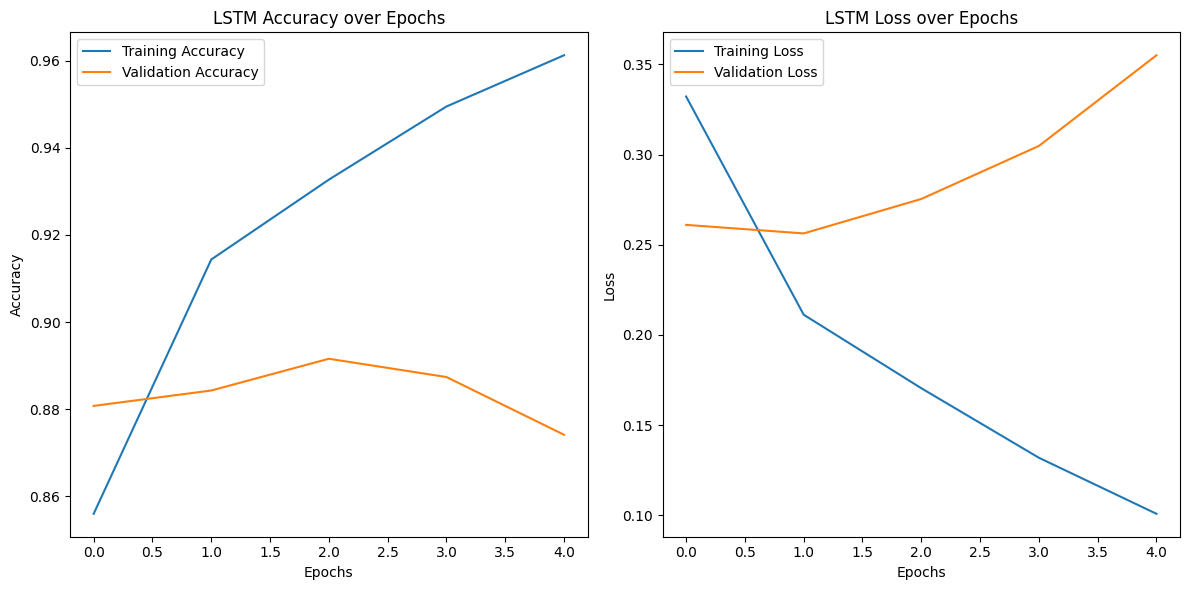

Training GRU model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


283/283 - 361s - 1s/step - accuracy: 0.8573 - loss: 0.3341 - val_accuracy: 0.8903 - val_loss: 0.2646
Epoch 2/10
283/283 - 382s - 1s/step - accuracy: 0.9144 - loss: 0.2077 - val_accuracy: 0.8823 - val_loss: 0.2662
Epoch 3/10
283/283 - 405s - 1s/step - accuracy: 0.9330 - loss: 0.1625 - val_accuracy: 0.8752 - val_loss: 0.2902
Epoch 4/10
283/283 - 376s - 1s/step - accuracy: 0.9535 - loss: 0.1232 - val_accuracy: 0.8777 - val_loss: 0.3349
Test Accuracy (GRU): 89.03%
142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step
Precision (GRU): 0.9116
Recall (GRU): 0.9594
F1 Score (GRU): 0.9349
AUC (GRU): 0.9215


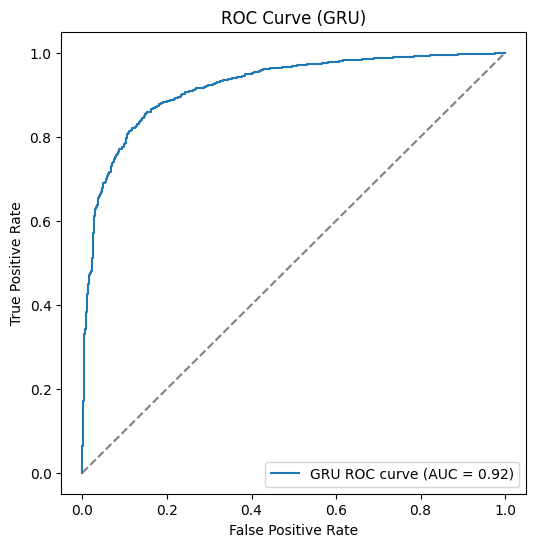

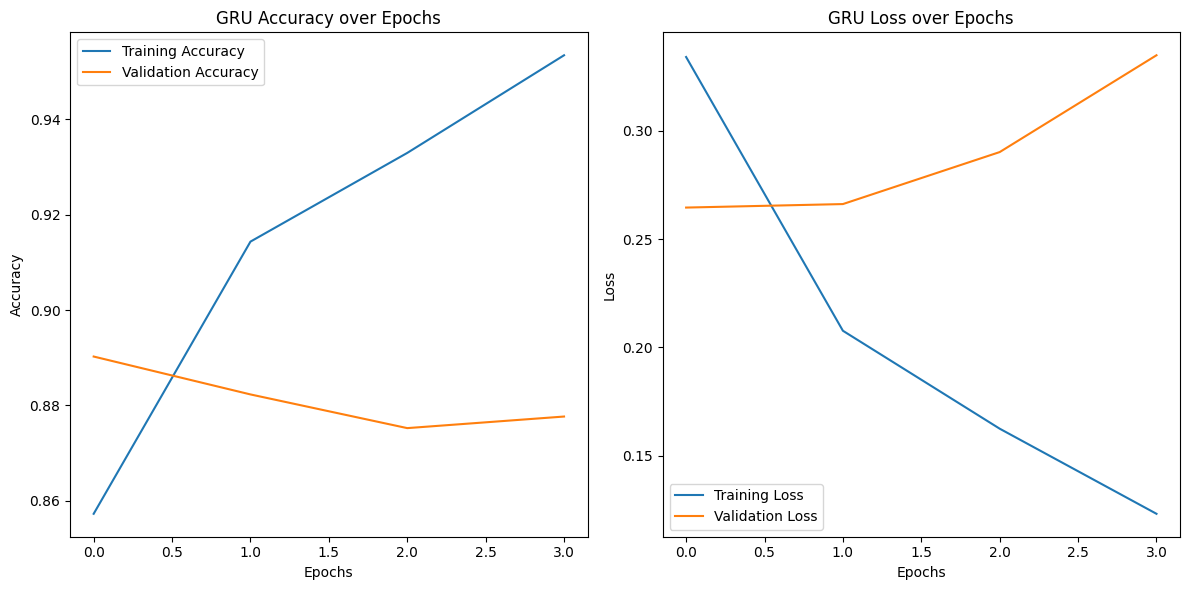

In [23]:
# Train and evaluate the models (RNN, LSTM, GRU)
def train_and_evaluate(model, model_name):
    print(f"Training {model_name} model...")

    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=2)

    # Evaluate the model
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy ({model_name}): {score[1]*100:.2f}%")

    # Predict and calculate evaluation metrics
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    print(f"Precision ({model_name}): {precision:.4f}")
    print(f"Recall ({model_name}): {recall:.4f}")
    print(f"F1 Score ({model_name}): {f1:.4f}")
    print(f"AUC ({model_name}): {auc:.4f}")

    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name})')
    plt.legend(loc='lower right')
    plt.show()

    # Visualize accuracy and loss curves
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train and evaluate RNN, LSTM, and GRU models
rnn_model = build_model_rnn()
train_and_evaluate(rnn_model, "SimpleRNN")

lstm_model = build_model_lstm()
train_and_evaluate(lstm_model, "LSTM")

gru_model = build_model_gru()
train_and_evaluate(gru_model, "GRU")